# 1.Importing libraries

In [ ]:
# Installing TensorFlow Decision Forests
!pip install tensorflow_decision_forests

# Installing wurlitzer to display the detailed training logs in Colabs (when using verbose=2 in the model constructor)
!pip install wurlitzer

In [ ]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.11.0


The code cell limits the output height in colab.

In [ ]:
#@title

from IPython.core.magic import register_line_magic
from IPython.display import Javascript
from IPython.display import display as ipy_display

# Some of the model training logs can cover the full
# screen if not compressed to a smaller viewport.
# This magic allows setting a max height for a cell.
@register_line_magic
def set_cell_height(size):
  ipy_display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

Set the random seed for generating random numbers, ensuring the results from data generating functions remain the same after each run.

In [ ]:
np.random.seed(21)
tf.random.set_seed(21)

# 2.Train a Random Forest model


In this notebook, we train, evaluate and analyse a binary classification Random Forest model trained on the [Titanic](https://www.kaggle.com/competitions/titanic/data) dataset.

<center>
<img src="https://www.kaggle.com/competitions/3136/images/header" width="70%"/></center>

**Note:** This dataset has been preprocessed in file `data_preprocessing.ipynb` and separated into 3 files (included in the project): `train.csv`, `val.csv` and `test.csv`.

## 2.1Load the dataset and convert it in a tf.Dataset

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/train.csv", index_col="PassengerId")
val_df = pd.read_csv("/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/val.csv", index_col="PassengerId")
test_df = pd.read_csv("/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/test.csv", index_col="PassengerId")

In [ ]:
train_df.head()

,Age,Fare,FamilySize,Pclass,Sex,Embarked,Title_Name,Survived
PassengerId,,,,,,,,
693,25.0,56.4958,1,3,male,S,Mr,1
482,30.0,0.0000,1,2,male,S,Mr,0
528,40.0,221.7792,1,1,male,S,Mr,0
856,18.0,9.3500,2,3,female,S,Mrs,1
802,31.0,26.2500,3,2,female,S,Mrs,1


In [ ]:
val_df.head()

,Age,Fare,FamilySize,Pclass,Sex,Embarked,Title_Name,Survived
PassengerId,,,,,,,,
566,24.0,24.1500,3,3,male,S,Mr,0
161,44.0,16.1000,2,3,male,S,Mr,0
554,22.0,7.2250,1,3,male,C,Mr,1
861,41.0,14.1083,3,3,male,S,Mr,0
242,21.5,15.5000,2,3,female,Q,Miss,1


In [ ]:
test_df.head()

,Age,Fare,FamilySize,Pclass,Sex,Embarked,Title_Name
PassengerId,,,,,,,
892,34.5,7.8292,1,3,male,Q,Mr
893,47.0,7.0000,2,3,female,S,Mrs
894,62.0,9.6875,1,2,male,Q,Mr
895,27.0,8.6625,1,3,male,S,Mr
896,22.0,12.2875,3,3,female,S,Mrs


In the above data set, column `PClass` has values **1**, **2** and **3** corresponding to ticket classes **1st**, **2nd** and **3rd**. We convert the values to the correct format to avoid TFDF misinterpreting it as numerical feature.

In [ ]:
train_df['Pclass'] = train_df['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
val_df['Pclass'] = val_df['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
test_df['Pclass'] = test_df['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})

And finally, convert the pandas dataframe (`pd.Dataframe`) into tensorflow datasets (`tf.data.Dataset`).

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Survived", task=tfdf.keras.Task.CLASSIFICATION)
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_df, label="Survived", task=tfdf.keras.Task.CLASSIFICATION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=None, task=tfdf.keras.Task.CLASSIFICATION)

## 2.2Train the model

Train Random Forest model using hyperparameter template `benchmark_rank1@v1`.

Read more at: [tfdf.keras.RandomForestModel](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel)

In [ ]:
%set_cell_height 300

model = tfdf.keras.RandomForestModel(
    verbose=2,
    hyperparameter_template="benchmark_rank1@v1",
    task=tfdf.keras.Task.CLASSIFICATION
)

model.compile(metrics=["accuracy"])

history = model.fit(x=train_ds)

<IPython.core.display.Javascript object>

Resolve hyper-parameter template "benchmark_rank1@v1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use 2 thread(s) for training
Use /tmp/tmp5_k34q5x as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Age': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Fare': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'FamilySize': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'Pclass': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Sex': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'Embarked': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'Title_Name': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Age': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tenso

I0000 00:00:1734100810.854028    1609 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1734100810.854083    1609 kernel.cc:783] Collect training examples
I0000 00:00:1734100810.854095    1609 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1734100810.854790    1609 kernel.cc:401] Number of batches: 1
I0000 00:00:1734100810.854815    1609 kernel.cc:402] Number of examples: 712
I0000 00:00:1734100810.855181    1609 kernel.cc:802] Training dataset:
Number of records: 712
Number of columns: 8

Number of columns by type:
	CATEGORICAL: 5 (62.5%)
	NUMERICAL: 3 (37.5%)

Columns:

CATEGORICAL: 5 (62.5%)
	1: "Embarked" CATEGORICAL has-dict vo

Model trained in 0:00:00.742450
Compiling model...
Model compiled.


# 3.Model structure and feature importance

In [ ]:
%set_cell_height 300

model.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	Age
	Embarked
	FamilySize
	Fare
	Pclass
	Sex
	Title_Name

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.        "Age"  0.304518 ################
    2. "Title_Name"  0.262706 ############
    3.     "Pclass"  0.234446 #########
    4. "FamilySize"  0.195077 #####
    5.        "Sex"  0.180653 ####
    6.       "Fare"  0.167263 ###
    7.   "Embarked"  0.131061 

Variable Importance: NUM_AS_ROOT:
    1. "Title_Name" 154.000000 ################
    2.        "Sex" 98.000000 ##########
    3.     "Pclass" 25.000000 ##
    4.       "Fare"  8.000000 
    5.        "Age"  7.000000 

Variable importances generally indicate how much a feature contributes to the model predictions or quality.

In [ ]:
inspector = model.make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


 Display the important features for the Variable Importance `NUM_AS_ROOT`.

 The larger the importance score for `NUM_AS_ROOT`, the more impact it has on the outcome of the model.

The list is sorted from the most important to the least. From the output, can infer that the feature at the top of the list is used as the root node in most number of trees than any other feature.


In [ ]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("Title_Name" (4; #6), 154.0),
 ("Sex" (4; #5), 98.0),
 ("Pclass" (4; #4), 25.0),
 ("Fare" (1; #3), 8.0),
 ("Age" (1; #0), 7.0),
 ("FamilySize" (1; #2), 6.0),
 ("Embarked" (4; #1), 2.0)]

# 4Evaluate the model

## 4.1Plot the model

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

**Remarks:**
- The above code plot the first tree of Random Forest model.
- The root node on the left contains the first condition (`Title_Name` in **Mr**), number of examples (712) and label distribution (the red-blue bar).
- Green branches indicate that the condition in the node is true. Red branches indicate otherwise.
- The deeper the node, the more pure they become, the label distribution is biased toward a subset of classes.

## 4.2 Predict on the validation data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=712, accuracy=0.8328651685393258, loss=0.6106589918215811, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = model.evaluate(val_ds, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value}")

1/1 [==============================] - 0s 331ms/step - loss: 0.0000e+00 - accuracy: 0.8156
loss: 0.0
accuracy: 0.8156424760818481


**Remarks:**
- The model is trained on 300 trees with Out-of-bag accuracy = 0.832865 and logloss = 0.61065.
- The val accuracy = 0.815642 is close to the Out-of-bag accuracy.

In [ ]:
y_pred_proba = model.predict(val_ds)

1/1 [==============================] - 0s 64ms/step


Because the prediction result is a probability, it will be converted to the value of labels 0 and 1.

In [ ]:
y_pred = np.where(y_pred_proba > 0.5, 1, 0)
y_pred = y_pred.reshape(-1)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

## 4.3 Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def show_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, normalize: bool=False) -> None:
  """

  """
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(5,5))
  confusion = confusion_matrix(y_true, y_pred)

  axis_labels = range(2)

  if normalize:
    confusion = confusion / confusion.sum(axis=1, keepdims=True)
    ax = sns.heatmap(
        confusion, xticklabels=axis_labels, yticklabels=axis_labels,
        cmap='Blues', annot=True, fmt='.4f', square=True, vmin=0, vmax=1)
  else:
    ax = sns.heatmap(
        confusion, xticklabels=axis_labels, yticklabels=axis_labels,
        cmap='Blues', annot=True, square=True, vmin=0, vmax=len(y_pred))

  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

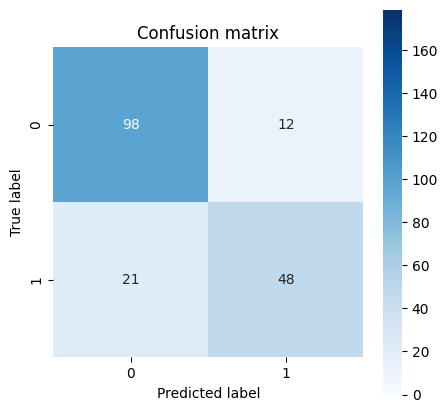

In [ ]:
show_confusion_matrix(val_df["Survived"].values, y_pred)

In [ ]:
val_df["Survived"].value_counts()

,count
Survived,
0,110
1,69


**Remarks**
- **True Positives (TP):** 48/69 instances of Class 1 were correctly predicted as Class 1.
- **True Negatives (TN):** 98/110 instances of Class 0 were correctly predicted as Class 0.
- **False Positives (FP):** 12 instances of Class 0 were incorrectly predicted as Class 1 (Type I error).
- **False Negatives (FN):** 21 instances of Class 1 were incorrectly predicted as Class 0 (Type II error).

**Summary:** The model appears better at detecting Class 0 than Class 1 because it is affected by the imbalance between the two classes.

## 4.4 Classification Report

In [ ]:
print(classification_report(val_df["Survived"].values, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



**Remarks**

**1. Class 0 Performance**
- Class 0 performs better in recall compared to precision, indicating the model identifies most positive instances correctly.

**2. Class 1 Performance**
- Class 1 shows slightly lower recall and F1-Score, which might indicate the model struggles more with this class.

**3. Overall Performance**
- **Accuracy**: 0.82
- The overall accuracy is fairly strong at 82%. The weighted averages align closely with individual metrics, suggesting a balanced contribution from both classes.

**Summary:** The model performs better for class 0 than class 1, as indicated by higher recall and F1-score for class 0.


## 4.5 ROC Curve and AUC Scores

AUC: 0.853


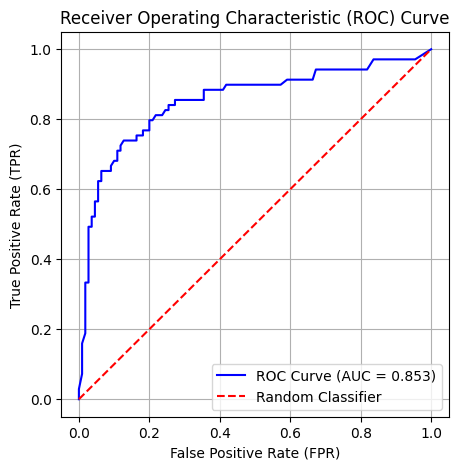

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(val_df["Survived"].values, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(val_df["Survived"].values, y_pred_proba)
print(f"AUC: {auc:.3f}")

# Plot ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Remarks**

- **Shape and Area Under the Curve (AUC):** The curve has a clear convex shape, indicating that the model performs better than random guessing (represented by the red dashed diagonal line). The AUC value of 0.853 is quite good, showing strong model discrimination between positive and negative classes.
- **True Positive Rate (TPR) vs. False Positive Rate (FPR):** The model achieves a high TPR while maintaining a relatively low FPR, which signifies that the classifier is effective at identifying true positives without making many false positives.

## 4.6 Plotting the training logs

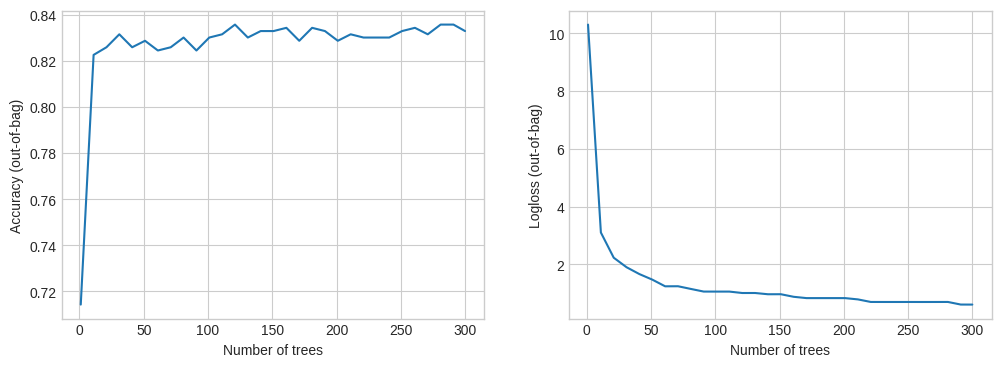

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

**Remarks:** From the two graphs we see that the model converges at a moderate speed. The model's OOB accuracy fluctuates quite a bit during the training process.

In [ ]:
# Save results for comparison between models
from sklearn.metrics import precision_score, recall_score, f1_score

result_metrics_df = pd.read_csv("/content/drive/MyDrive/Final Exam ML/source codes/result_metrics.csv")
result_metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,CART,0.821229,0.862745,0.637681,0.733333


In [ ]:
# Save results for comparison between models
from sklearn.metrics import precision_score, recall_score, f1_score

new_row = pd.DataFrame({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(val_df["Survived"].values, y_pred),
    'Precision': precision_score(val_df["Survived"].values, y_pred),
    'Recall': recall_score(val_df["Survived"].values, y_pred),
    'F1-Score': f1_score(val_df["Survived"].values, y_pred)
}, index=[len(result_metrics_df)])

result_metrics_df = pd.concat([result_metrics_df, new_row], ignore_index=True)

result_metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,CART,0.821229,0.862745,0.637681,0.733333
1,Random Forest,0.815642,0.800000,0.695652,0.744186


In [ ]:
result_metrics_df.to_csv('/content/drive/MyDrive/Final Exam ML/source codes/result_metrics.csv', index=False)